In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Country-data.csv")

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.shape

(167, 10)

In [11]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


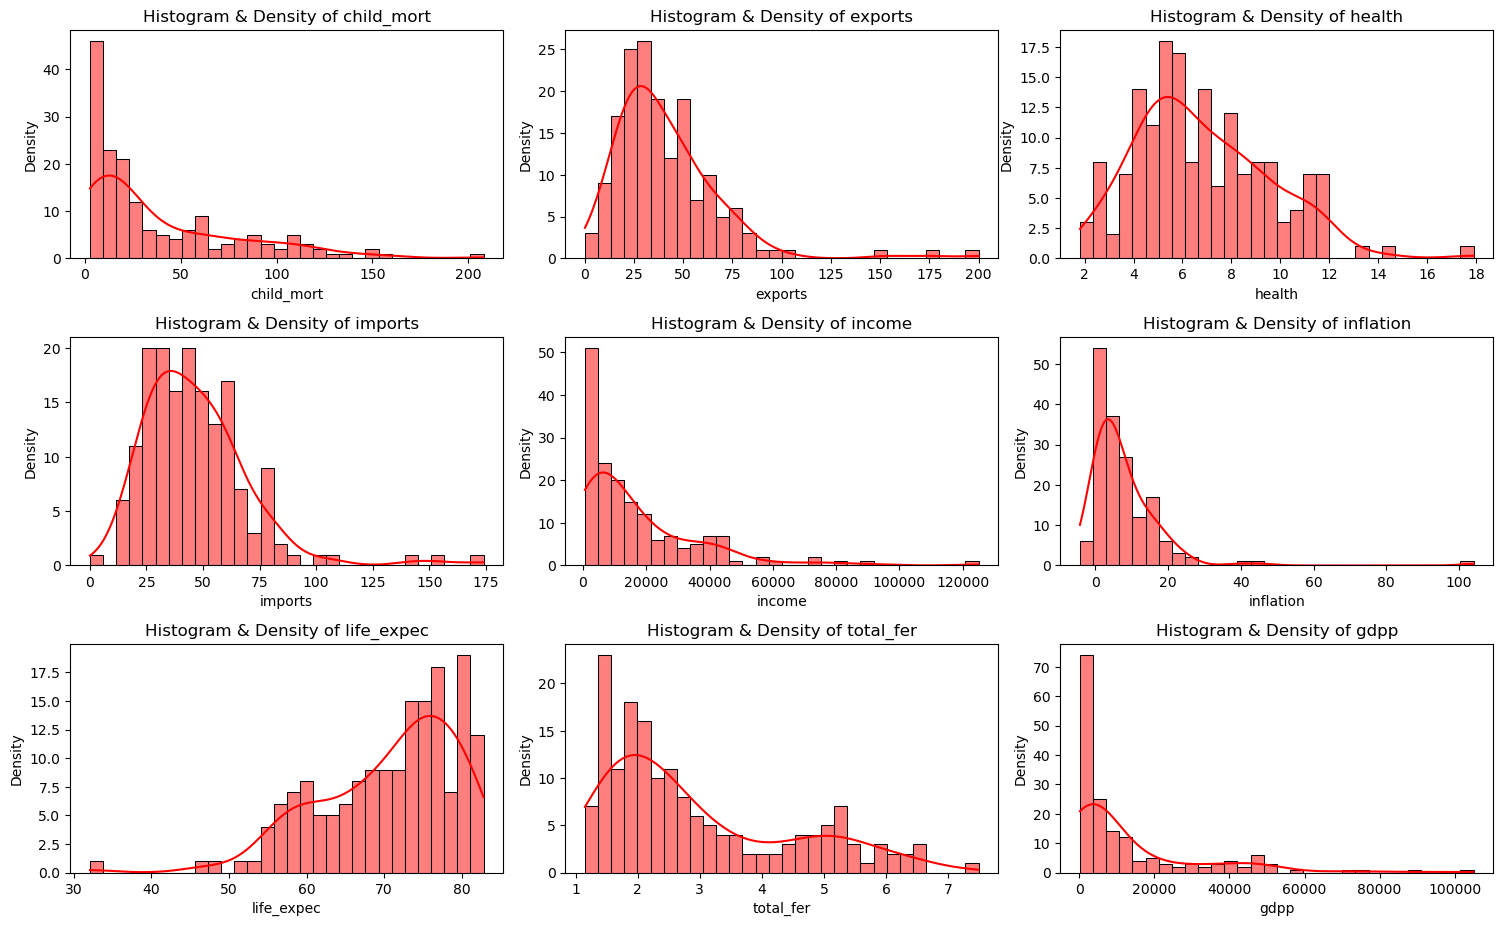

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df
numeric_cols = df.drop(columns=['country'])  # drop non-numeric column

# Set figure size
plt.figure(figsize=(15, 12))

# Loop through each numeric column
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(4, 3, i)  # 4x3 grid (since you have around 9 variables)
    sns.histplot(df[col], kde=True, bins=30, color="Red")
    plt.title(f"Histogram & Density of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


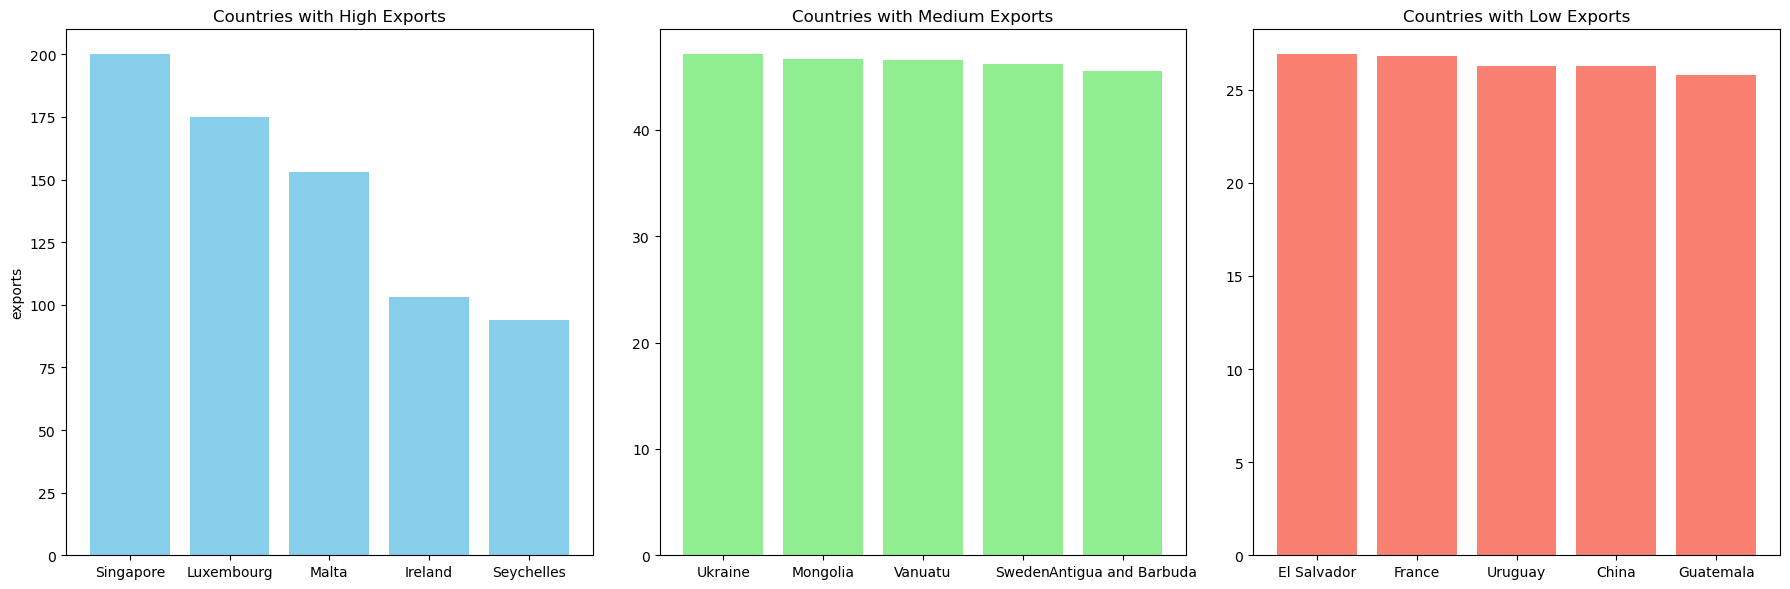

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_groups(df, col):
    # Sort data
    df_sorted = df.sort_values(by=col, ascending=False).reset_index(drop=True)
    
    # Split into 3 parts
    n = len(df_sorted)
    high = df_sorted.iloc[:n//3]
    medium = df_sorted.iloc[n//3:2*n//3]
    low = df_sorted.iloc[2*n//3:]
    
    # Plot top 5 in each group
    fig, axes = plt.subplots(1, 3, figsize=(18,6))

    # High
    axes[0].bar(high['country'][:5], high[col][:5], color='skyblue')
    axes[0].set_title("Countries with High " + col.capitalize())
    axes[0].set_ylabel(col)

    # Medium
    axes[1].bar(medium['country'][:5], medium[col][:5], color='lightgreen')
    axes[1].set_title("Countries with Medium " + col.capitalize())

    # Low
    axes[2].bar(low['country'][:5], low[col][:5], color='salmon')
    axes[2].set_title("Countries with Low " + col.capitalize())

    plt.tight_layout()
    plt.show()

# Example usage:
plot_groups(df, "exports")



=== Exports ===


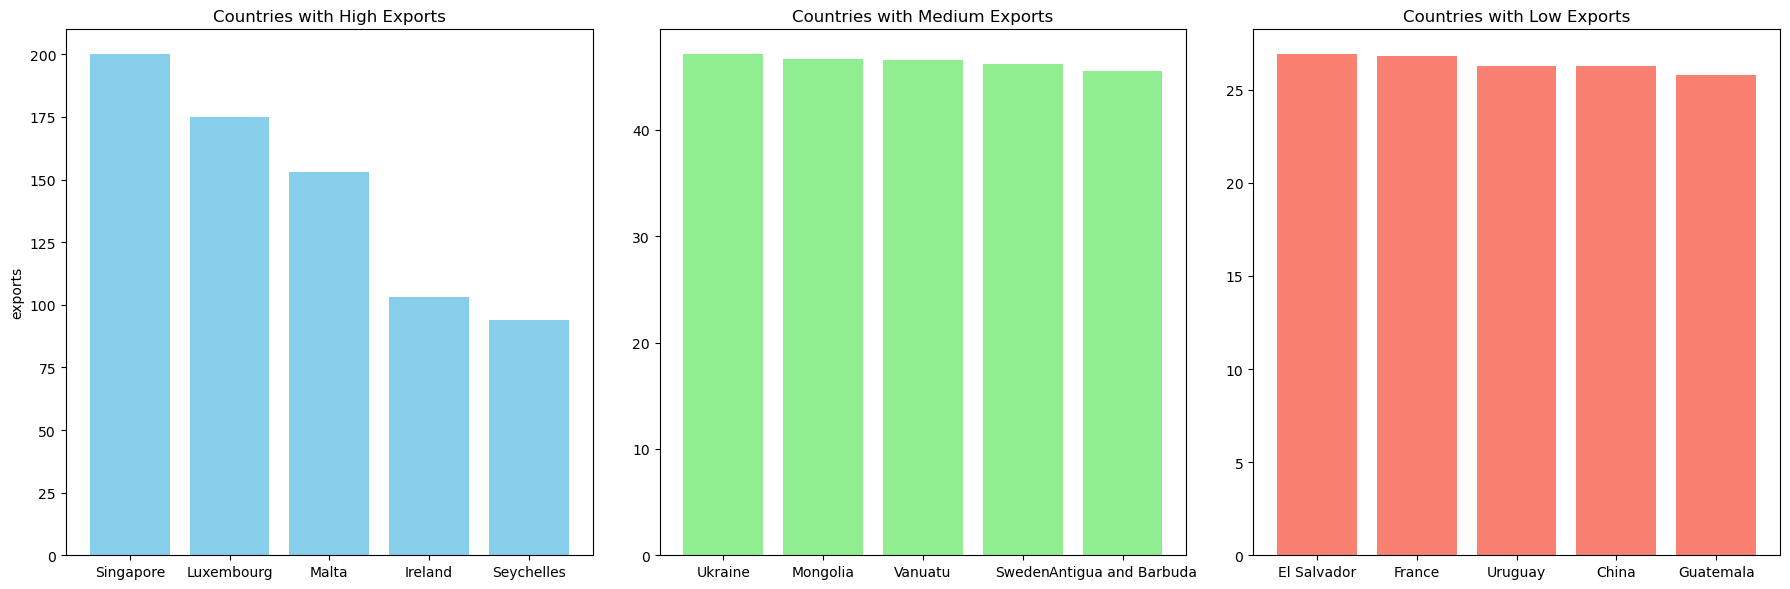

=== Health ===


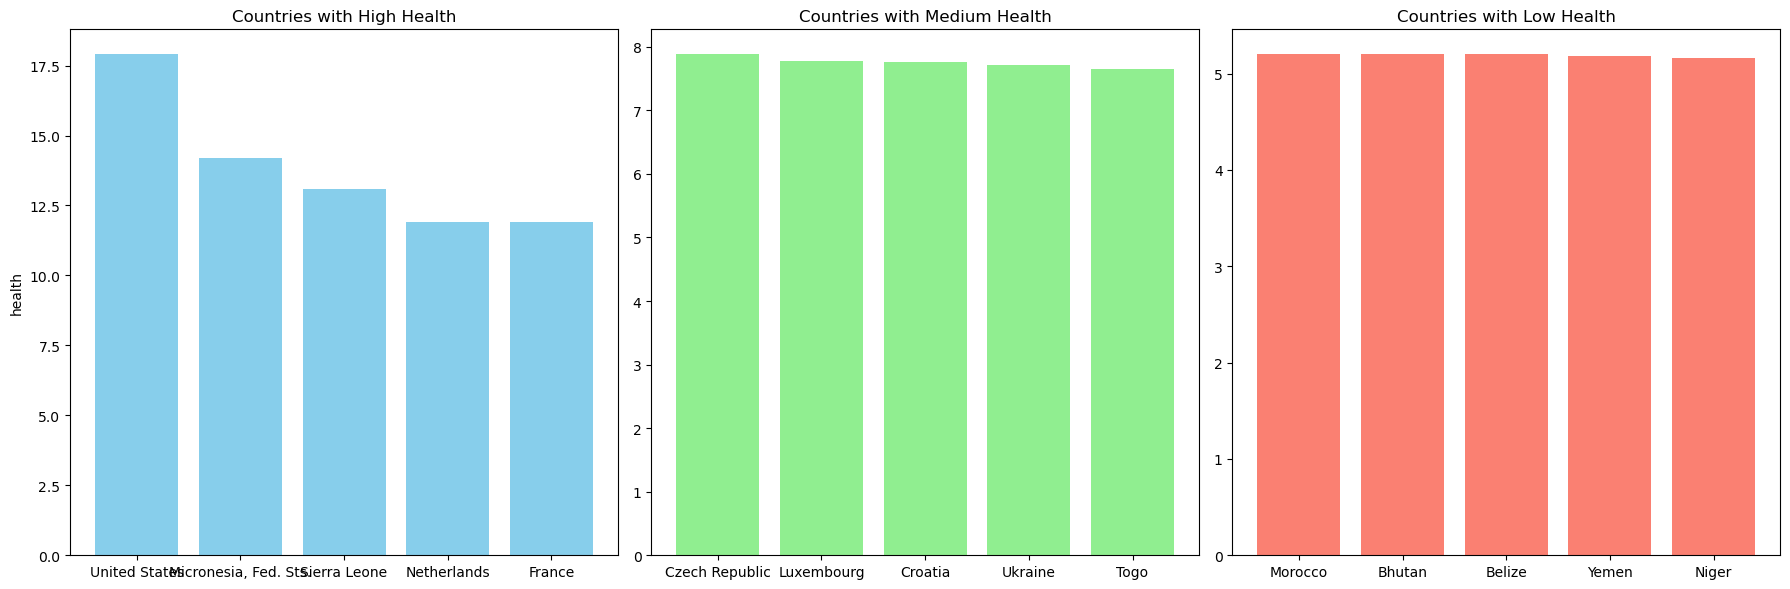

=== Imports ===


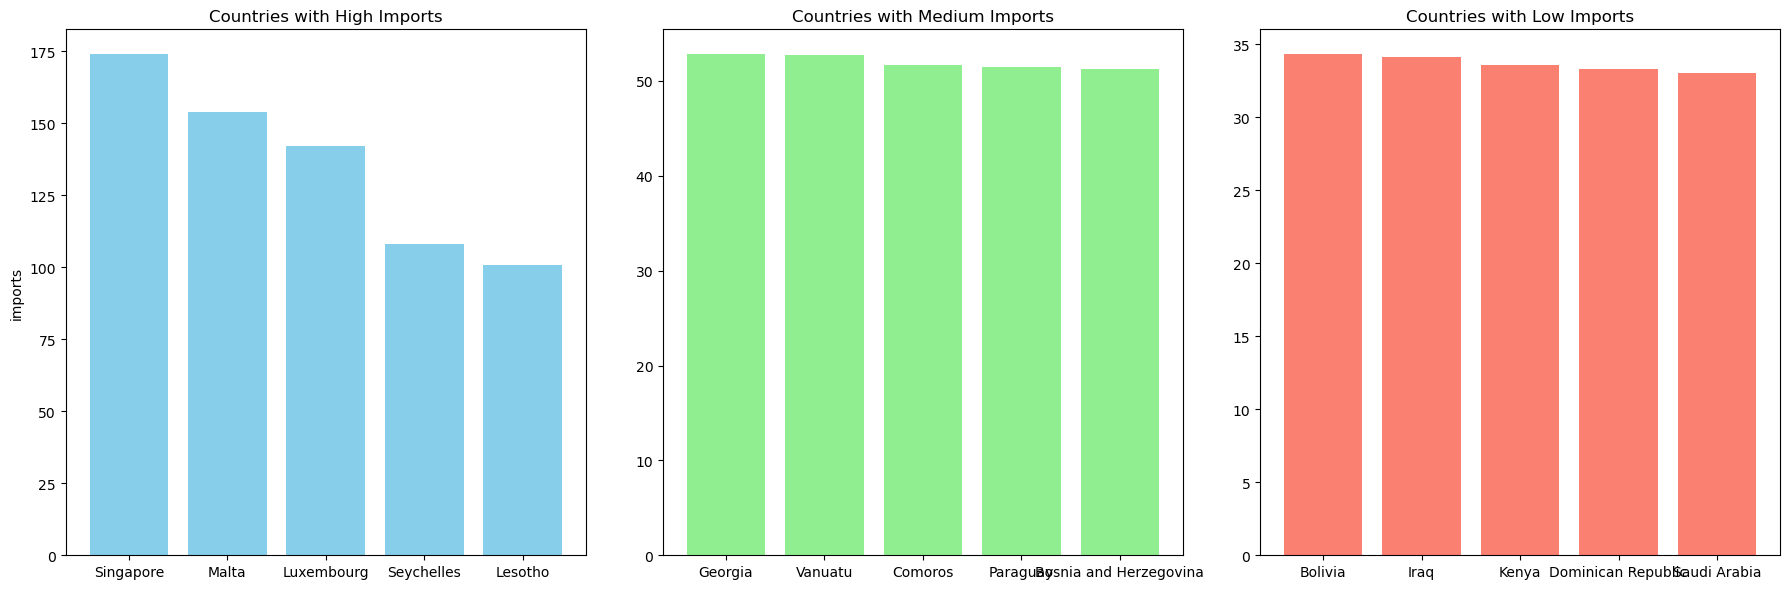

=== Income ===


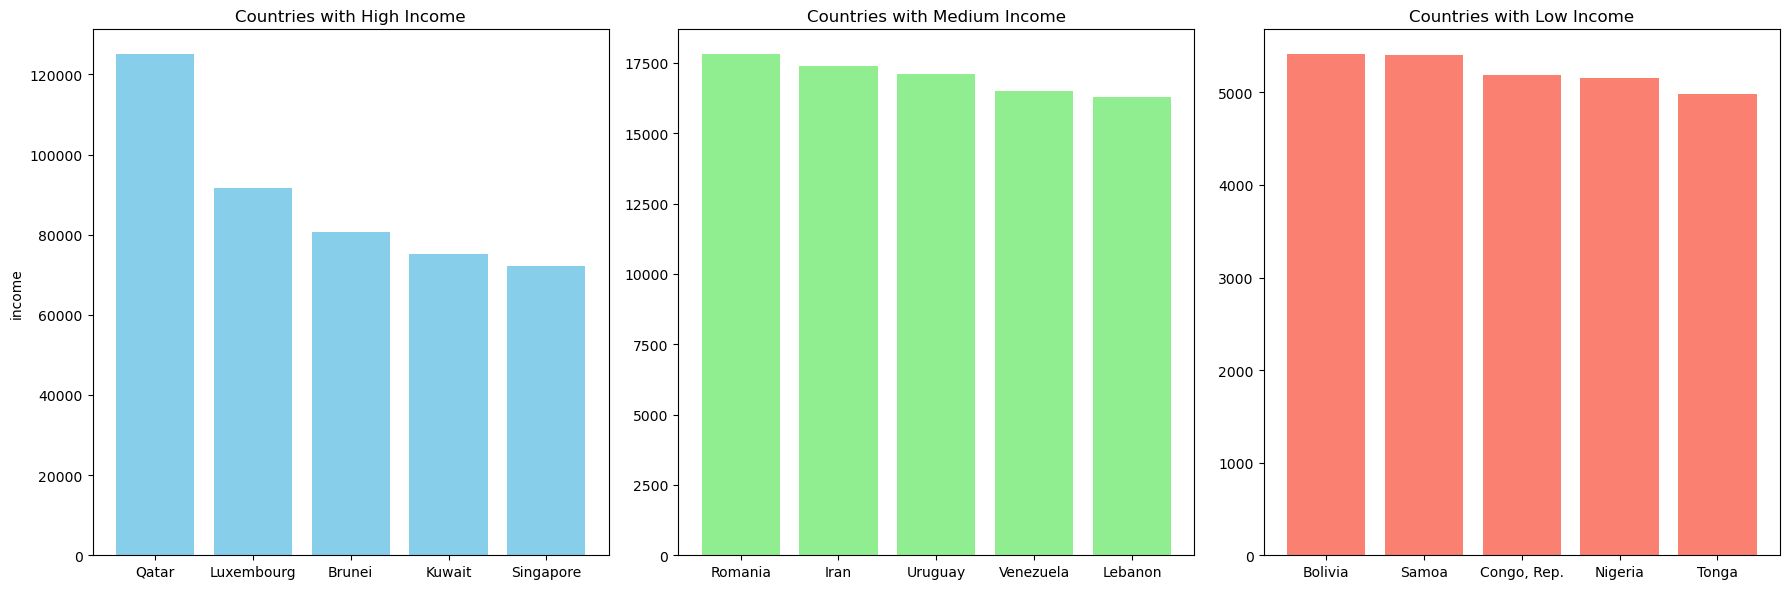

=== Inflation ===


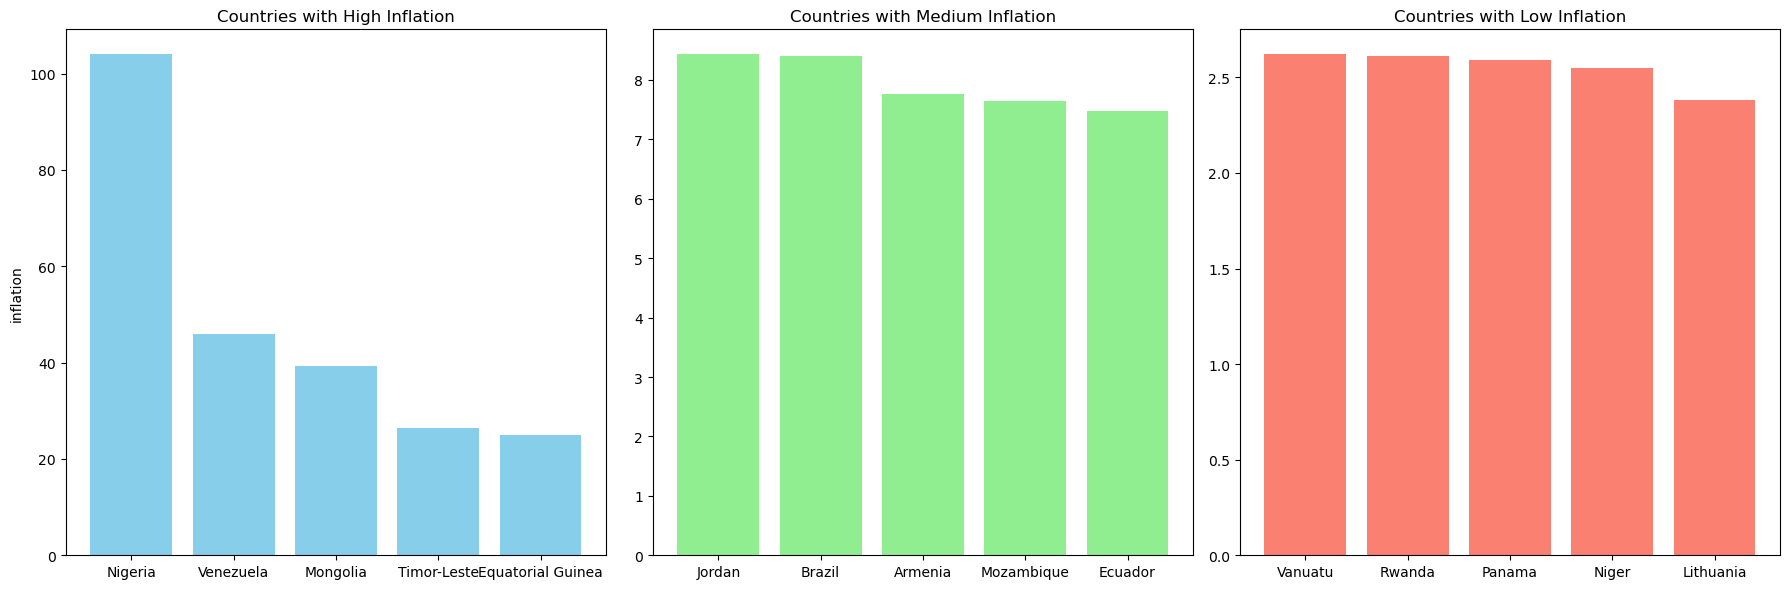

=== Life_expec ===


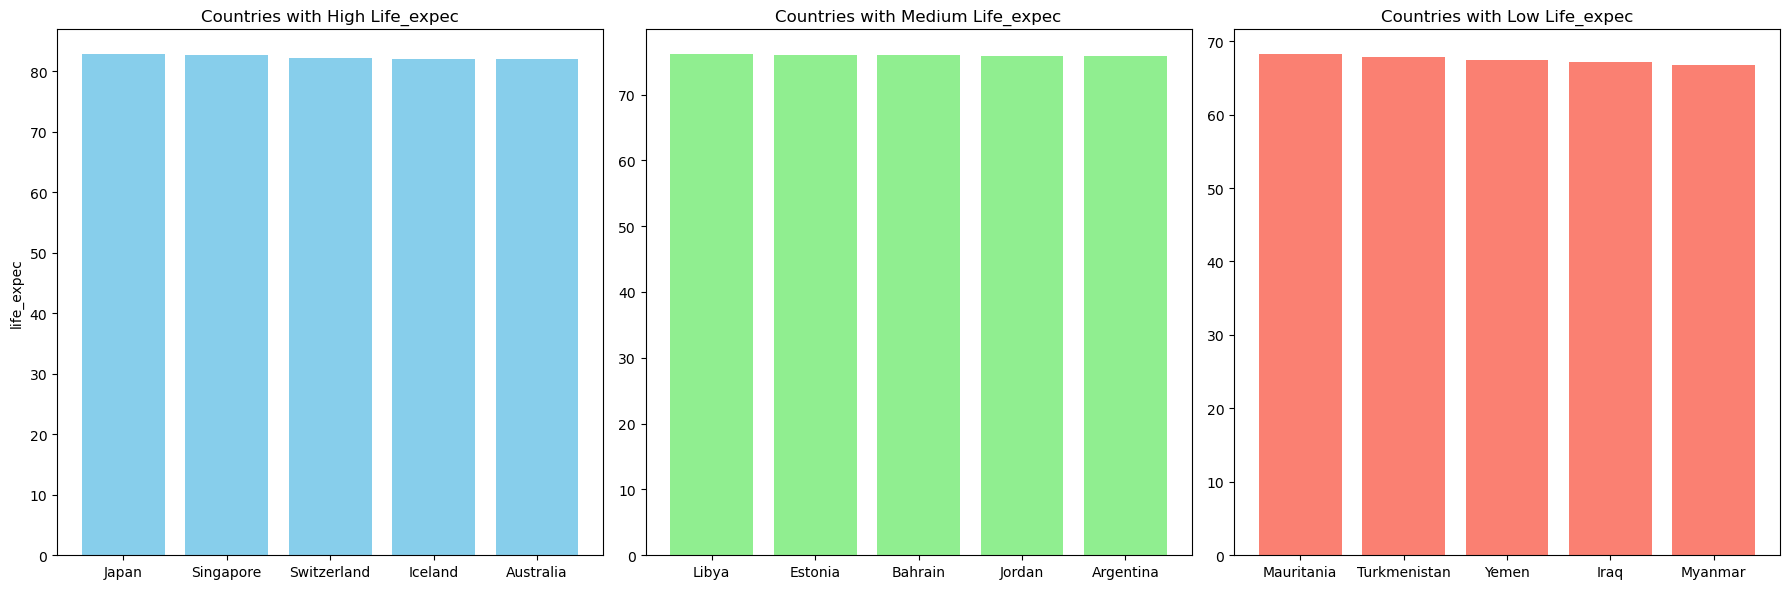

=== Gdpp ===


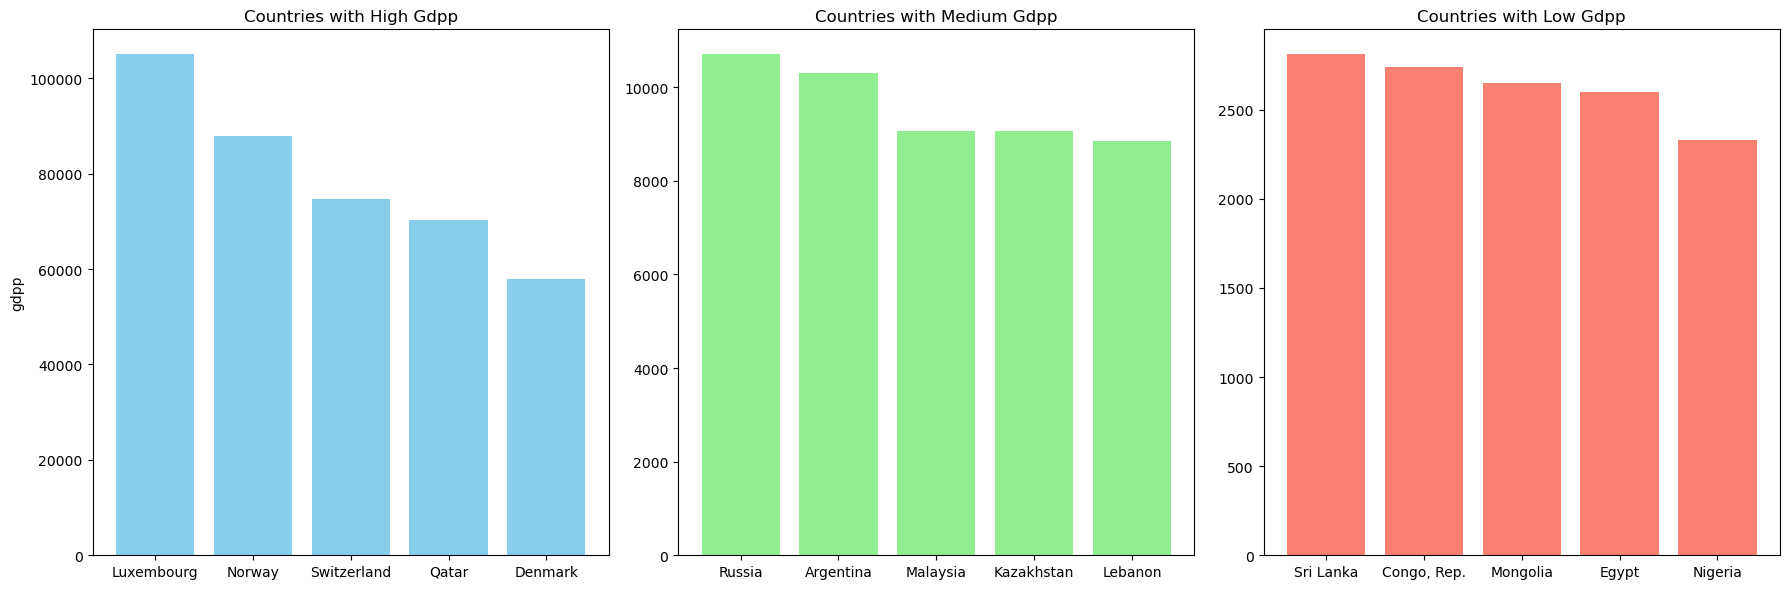

=== Child_mort ===


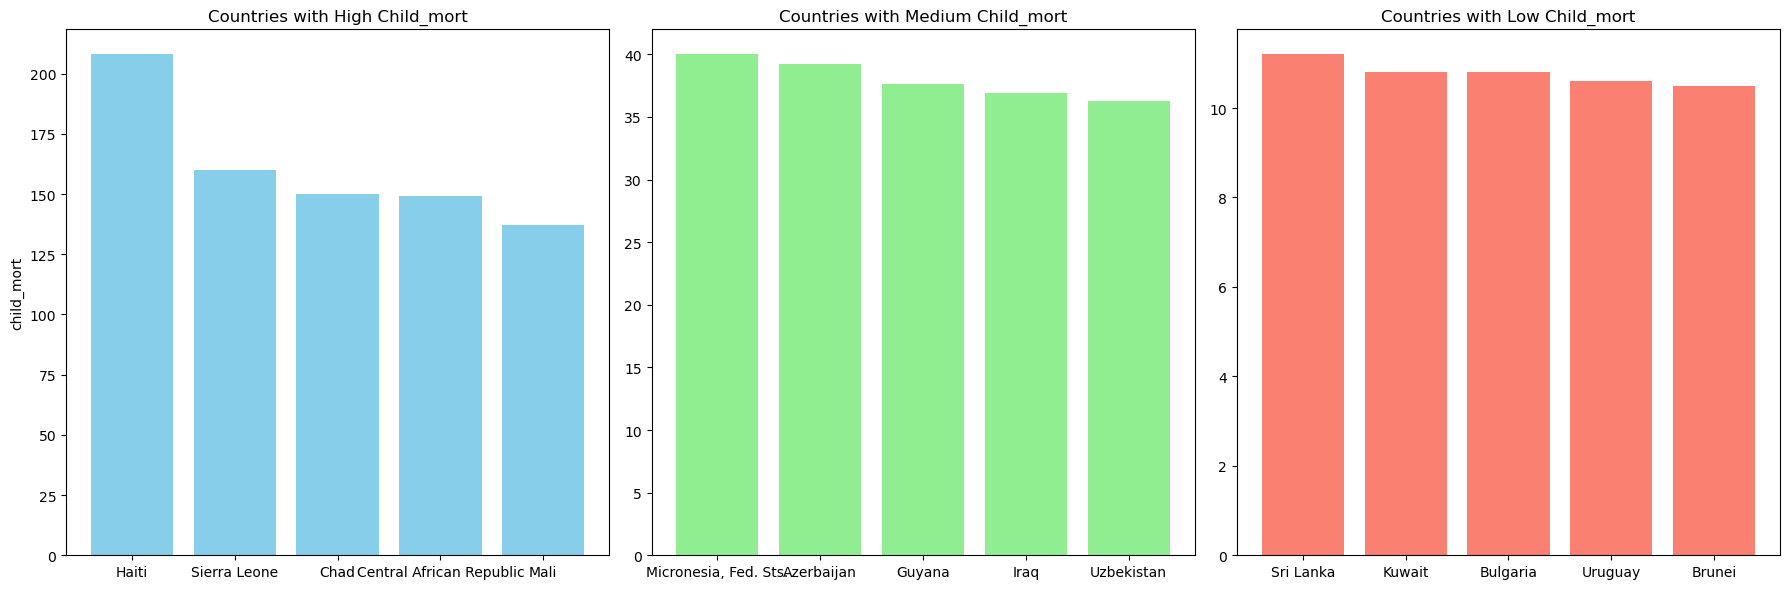

=== Total_fer ===


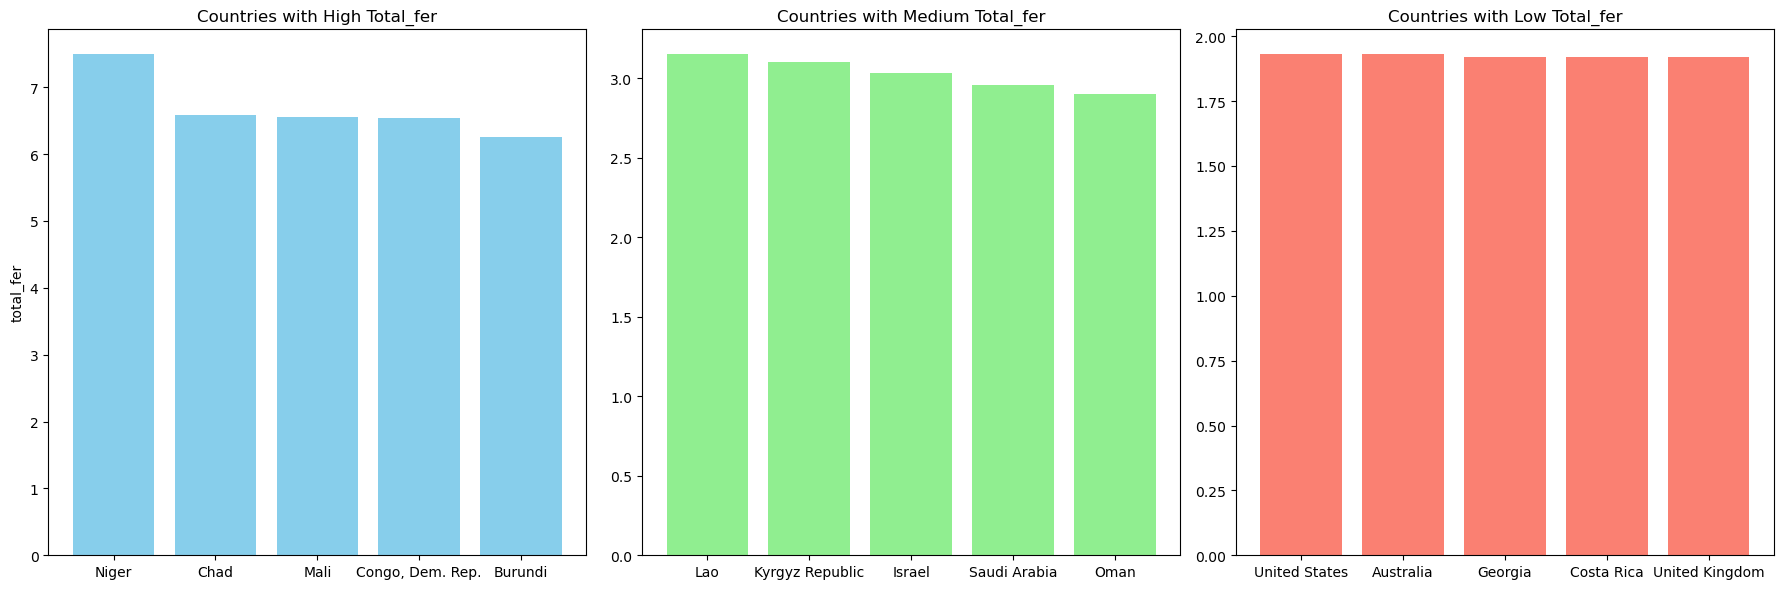

In [27]:
cols_to_plot = ["exports", "health","imports", "income", "inflation", "life_expec", "gdpp","child_mort","total_fer"]

for col in cols_to_plot:
    print(f"=== {col.capitalize()} ===")
    plot_groups(df, col)


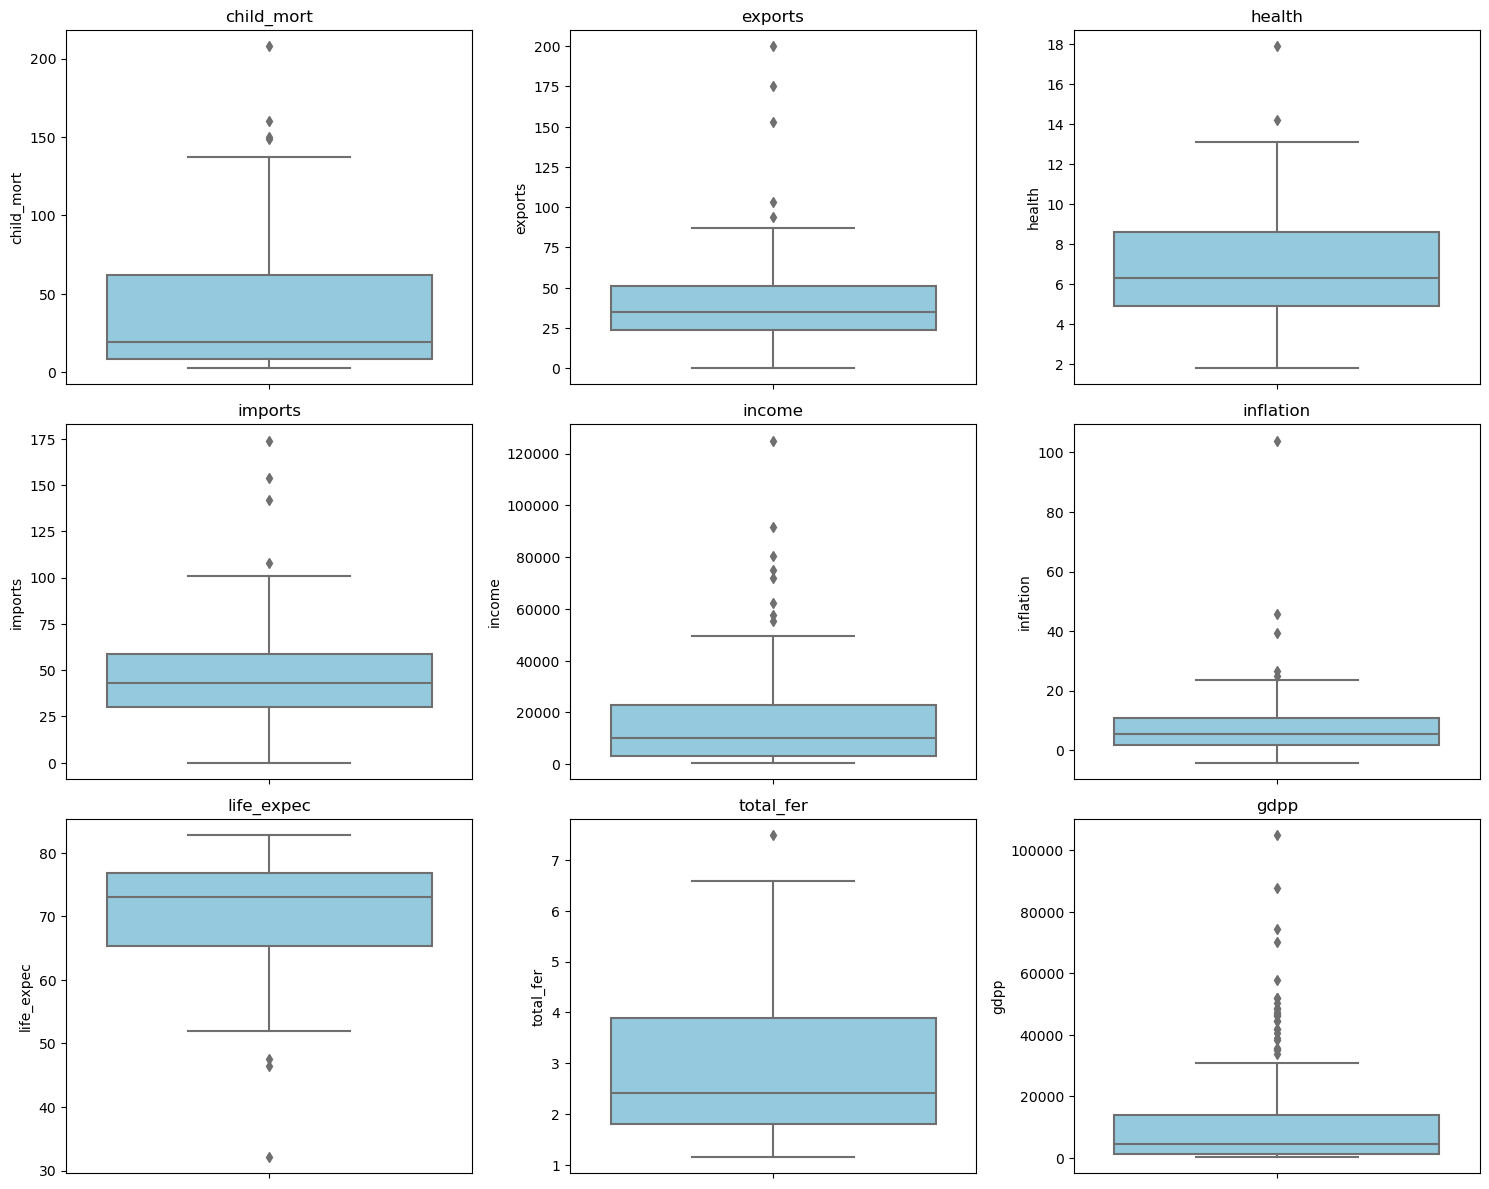

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric column
numeric_df = df.drop(columns=['country'])

# Plot boxplots for each variable
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(3, 3, i)   # adjust rows/cols depending on number of variables
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()


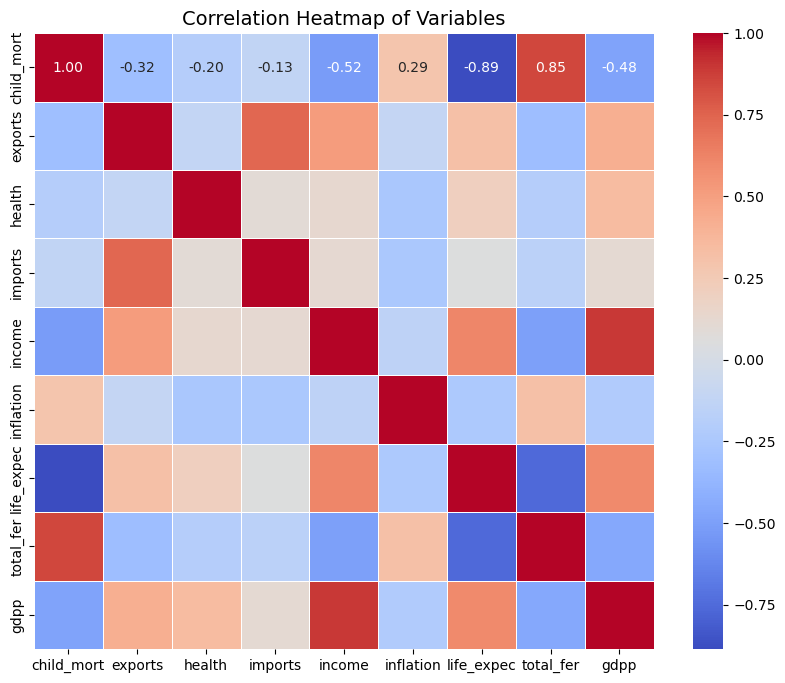

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric column (country)
numeric_df = df.drop(columns=['country'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Variables", fontsize=14)
plt.show()


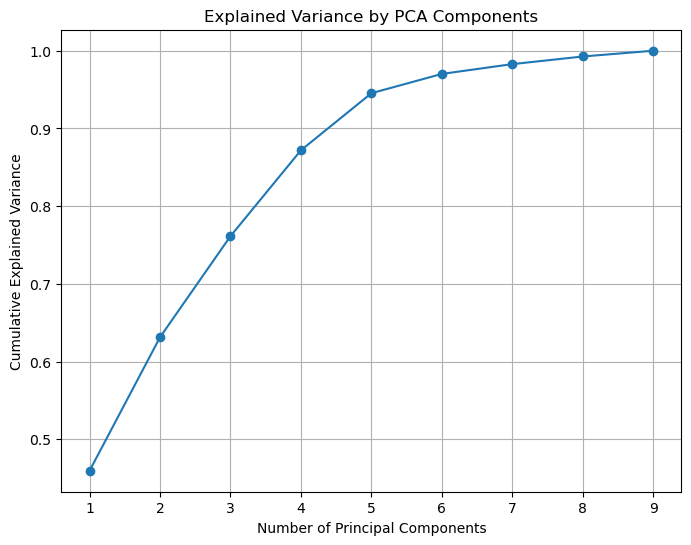

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310 -0.254597  0.383000   
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677  0.084579  0.248919   
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475 -0.401696 -0.087214   
3 -2.932423  1.695555  1.525044  0.839625 -0.273209 -0.547996 -0.440835   
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007 -0.206919  0.241978   

        PC8       PC9  
0  0.415076 -0.014148  
1 -0.221042  0.173316  
2 -0.184162  0.084037  
3 -0.355998 -0.091339  
4 -0.023681  0.094270  


In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Standardized data (from previous step)
numeric_df = df.drop(columns=['country'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Scree Plot (variance explained by each component)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

# Convert PCA results into DataFrame
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(len(explained_variance))])
print(pca_df.head())
